<a href="https://colab.research.google.com/github/bountyhunter12/Shared_Task/blob/main/Linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/content/train.csv')

In [3]:
# Task 1: Data Selection
data['Levy'] = pd.to_numeric(data['Levy'].replace({'-': '0'}), errors='coerce')
filtered_data = data[(data['Fuel type'] != 'Diesel') & (data['Prod. year'] >= 2005)]


In [5]:
# Display the first row of the filtered dataset
print("First row:")
print(filtered_data.iloc[0])


First row:
ID                    45654403
Price                    13328
Levy                      1399
Manufacturer             LEXUS
Model                   RX 450
Prod. year                2010
Category                  Jeep
Leather interior           Yes
Fuel type               Hybrid
Engine volume              3.5
Mileage              186005 km
Cylinders                  6.0
Gear box type        Automatic
Drive wheels               4x4
Doors                   04-May
Wheel               Left wheel
Color                   Silver
Airbags                     12
Name: 0, dtype: object


In [6]:
# Display the last row of the filtered dataset
print("\nLast row:")
print(filtered_data.iloc[-1])


Last row:
ID                    45813273
Price                      470
Levy                       753
Manufacturer           HYUNDAI
Model                   Sonata
Prod. year                2012
Category                 Sedan
Leather interior           Yes
Fuel type               Hybrid
Engine volume              2.4
Mileage              186923 km
Cylinders                  4.0
Gear box type        Automatic
Drive wheels             Front
Doors                   04-May
Wheel               Left wheel
Color                    White
Airbags                     12
Name: 19236, dtype: object


In [ ]:
# Cleaning the 'Mileage' column
filtered_data['Mileage'] = filtered_data['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)


<ipython-input-6-1f9bd0e02f63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Mileage'] = filtered_data['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)


In [ ]:
# Average Levy
average_levy = filtered_data['Levy'].mean()

In [ ]:
# Task 2: Data Preparation
selected_features = ['Price', 'Levy', 'Mileage', 'Prod. year']
prepared_data = filtered_data[selected_features].dropna()

In [ ]:
# Splitting the dataset into Train (90%) and Test (10%) sets
train_data, test_data = train_test_split(prepared_data, test_size=0.1, random_state=42)
X_train = train_data.drop(columns=['Price']).values
y_train = train_data['Price'].values
X_test = test_data.drop(columns=['Price']).values
y_test = test_data['Price'].values

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Gradient Descent for Linear Regression
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            # Compute predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute cost and store it
            cost = np.mean((y - y_pred) ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

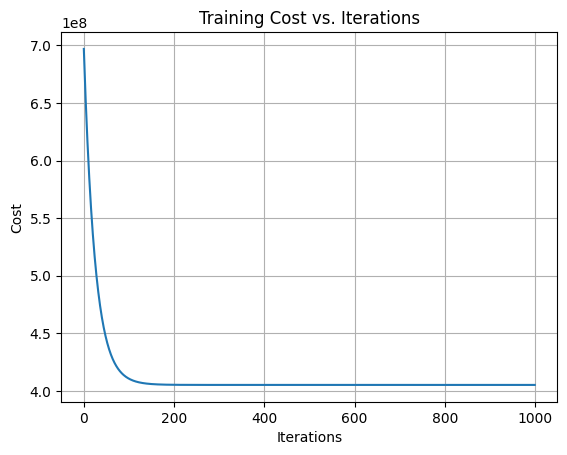

In [ ]:
# Training the model
learning_rate = 0.01
iterations = 1000
model = LinearRegressionGD(learning_rate=learning_rate, iterations=iterations)
model.fit(X_train_scaled, y_train)

# Extracting weights and bias
optimal_weights = model.weights
optimal_bias = model.bias

# Plotting training cost vs. iterations
plt.plot(range(iterations), model.cost_history)
plt.title("Training Cost vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()


In [ ]:
# Predictions and Evaluation
y_test_pred = model.predict(X_test_scaled)
test_cost = np.mean((y_test - y_test_pred) ** 2)

print("Optimal Weights:", optimal_weights)
print("Optimal Bias:", optimal_bias)
print("Test Set Cost:", test_cost)

Optimal Weights: [-1166.86701931   -13.18388789  4539.32483496]
Optimal Bias: 16496.20461788012
Test Set Cost: 348117506.8956897
